****PROJECT****


You are now done with Data Cleaning and ready to proceed to EDA!

Follow your Univariate and Bivariate lesson notebooks to guide your process.

**Step 1: Identify Variable Types**

Classify your columns into:
 - Numerical variables (e.g., age, income)
 - Categorical variables (e.g., gender, country)

This classification determines what types of plots and summary statistics you’ll use.


**Step 2: Univariate EDA (One Variable at a Time)**

Now, explore each variable individually - but only the ones relevant to your goal.

For numerical variables:
- Use .describe() for summary stats.
- Visualize distributions with histograms or boxplots.

For categorical variables:
- Use .value_counts() to see frequency counts.
- Visualize with bar plots (or pie charts, if you must :sonrisa:).

This step helps you understand the shape, spread, and patterns in your key variables.

**Step 3: Bivariate EDA (Two Variables at a Time)**

After univariate EDA, analyze relationships between two or more variables using:
- Grouped summaries (e.g., df.groupby())
- Cross-tabs (e.g., pd.crosstab())
- Scatter plots, bar plots, boxplots, etc.

Again, focus only on the relationships that are relevant to your research question.

**Step 4: From EDA to Questions**

Once you understand your data:
- Develop at least 10 simple questions that your cleaned dataset could help answer.

These questions should be:
- Relevant to your research goal
- Based on insights from your EDA
- Answerable using simple SQL queries

Example questions:
- What is the average age of customers in each region?
- How many products were purchased by each membership type?
- What is the total revenue per product category?

**Step 1: Identify Variable Types**

Classify your columns into:
 - Numerical variables (e.g., age, income)
 - Categorical variables (e.g., gender, country)

This classification determines what types of plots and summary statistics you’ll use.

In [7]:
# We import necessary Python libraries

import pandas as pd  # pandas is used for handling data tables (DataFrames)
import numpy as np   # numpy provides numerical operations support, though we may not use it yet

# Step 1.2 — Load the dataset
df = pd.read_csv("Motor vehicle insurance data.csv", sep=';')   # We use 'sep=";"' because the CSV uses semicolons instead of commas to separate columns.


df.info()   # We display the basic structure of the dataset


df.head()   # We display the first few rows (by default 5) to get a sense of the data content



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    105555 non-null  int64  
 1   Date_start_contract   105555 non-null  object 
 2   Date_last_renewal     105555 non-null  object 
 3   Date_next_renewal     105555 non-null  object 
 4   Date_birth            105555 non-null  object 
 5   Date_driving_licence  105555 non-null  object 
 6   Distribution_channel  105555 non-null  object 
 7   Seniority             105555 non-null  int64  
 8   Policies_in_force     105555 non-null  int64  
 9   Max_policies          105555 non-null  int64  
 10  Max_products          105555 non-null  int64  
 11  Lapse                 105555 non-null  int64  
 12  Date_lapse            35147 non-null   object 
 13  Payment               105555 non-null  int64  
 14  Premium               105555 non-null  float64
 15  

C:\Users\BOSCO\AppData\Local\Temp\ipykernel_132\1817048160.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Motor vehicle insurance data.csv", sep=';')   # We use 'sep=";"' because the CSV uses semicolons instead of commas to separate columns.


,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190


In [8]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("List of all variables (columns):")
print(list(df.columns))


The dataset contains 105555 rows and 30 columns.
List of all variables (columns):
['ID', 'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal', 'Date_birth', 'Date_driving_licence', 'Distribution_channel', 'Seniority', 'Policies_in_force', 'Max_policies', 'Max_products', 'Lapse', 'Date_lapse', 'Payment', 'Premium', 'Cost_claims_year', 'N_claims_year', 'N_claims_history', 'R_Claims_history', 'Type_risk', 'Area', 'Second_driver', 'Year_matriculation', 'Power', 'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Type_fuel', 'Length', 'Weight']


In [9]:
# STEP 1A — Numerical Variables

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns                # The function .select_dtypes() allows us to choose columns from our DataFrame
                                                                                     # based on their data types. Here, we tell pandas:
                                                                                     #    include=['int64', 'float64'] 
                                                                                     # which means: "select only the columns that store integers or floats". 
                                                                                     # The result of this command is another DataFrame, so we access only its # column names by adding .columns at the end.

print("Numeric columns detected by pandas:\n", list(numeric_cols))                   # Print the list of numeric column names so we can visually confirm them.
                                                                                     # The list() function converts the Index object returned by pandas into a plain Python list, making it easier to read when printed.


df.describe().T

                    # We this method we intend to display basic summary statistics for all numeric columns
                    # The .describe() method in pandas automatically computes descriptive statistics for numerical variables in the DataFrame:
                    #   count  → number of non-missing values
                    #   mean   → average value
                    #   std    → standard deviation (measure of spread)
                    #   min    → smallest observed value
                    #   25%    → first quartile (25% of data below this point)
                    #   50%    → median (middle value).
                    #   75%    → third quartile (75% of data below this point)
                    #   max    → largest observed value
                    # This gives us a quick idea of the range and distribution of each numeric column.
                    # We add .T (short for "transpose") to flip rows and columns, so each variable appears as one row instead of one column.


# Here, we manually confirm numerical variables using our domain knowledge
# Sometimes pandas misclassifies variables as numeric even though they are codes (for example, "1" = online channel, "2" = broker channel). Therefore, we also build a manual list based on what the data dictionary says are truly numerical.
manual_numeric = [
    'Distribution_channel',   # ID code for how the policy was sold (numeric but categorical)
    'Seniority',              # Age of the policy in months or years (numeric)
    'Policies_in_force',      # Number of active policies for a customer
    'Max_policies',           # Maximum policies allowed
    'Max_products',           # Maximum number of products held by the client
    'Lapse',                  # Number of lapsed (cancelled) policies
    'Premium',                # Premium amount paid (continuous variable)
    'Cost_claims_year',       # Cost of claims in the current year
    '%_claims_year',          # Percentage of claims relative to premium
    'N_claims_history',       # Number of historical claims
    '%_claims_history',       # Percentage of claims historically
    'Type_risk',              # Risk level indicator (numeric scale)
    'Power',                  # Vehicle power in HP or kW
    'Cylinder capacity',      # Engine size in cc
    'Value_vehicle',          # Vehicle value in currency units
    'Length',                 # Vehicle length (physical measurement)
    'Weight'                  # Vehicle weight (physical measurement)
]

# Finally, we print this manual list so that we can compare it with the automatically detected list from pandas.
print("\nManually confirmed numerical variables:\n", manual_numeric)


Numeric columns detected by pandas:
 ['ID', 'Seniority', 'Policies_in_force', 'Max_policies', 'Max_products', 'Lapse', 'Payment', 'Premium', 'Cost_claims_year', 'N_claims_year', 'N_claims_history', 'R_Claims_history', 'Type_risk', 'Area', 'Second_driver', 'Year_matriculation', 'Power', 'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Length', 'Weight']

Manually confirmed numerical variables:
 ['Distribution_channel', 'Seniority', 'Policies_in_force', 'Max_policies', 'Max_products', 'Lapse', 'Premium', 'Cost_claims_year', '%_claims_year', 'N_claims_history', '%_claims_history', 'Type_risk', 'Power', 'Cylinder capacity', 'Value_vehicle', 'Length', 'Weight']


In [10]:
# STEP 1B — Categorical Variables


categorical_cols = df.select_dtypes(include=['object']).columns             # The method .select_dtypes(include=['object']) tells pandas: "Select only those columns whose data type is object." 

print("Categorical columns detected by pandas:\n", list(categorical_cols))  # We then print this list so we can visually inspect which variables pandas considers to be categorical. This is useful for confirming that columns like 'Type_fuel' or 'Area' are indeed text and not numeric codes.

# Its important to display the number of unique values for each categorical column
# Knowing how many distinct categories each variable has helps will help us understand the structure of our dataset:
#   - A column with 2 unique values (e.g., "Male"/"Female") is binary.
#   - A column with 10 values (e.g., "Region") is multi-categorical.
#   - A column with hundreds of unique entries (e.g., "Vehicle_model") might require special treatment, because high-cardinality variables can be hard to visualize or model directly.

for col in categorical_cols:           # We create a for-loop to go through each categorical column one by one.
    unique_count = df[col].nunique()   # .nunique() counts how many different values exist in that column.

    print(f"{col}: {unique_count} unique values")     # We then print the column name and its number of unique categories.
                                                      # The f-string syntax (f"{col}: {unique_count}") lets us embed variables inside a string for readable printing.


# 3️⃣ (Optional) Manually confirm categorical variables using domain knowledge
# -------------------------------------------------------------------
# Some columns might be stored as integers but actually represent categories.
# For example, 'Area' may contain numbers (1, 2, 3) that correspond to
# geographical zones, not measurable quantities.
# Using the dataset's data dictionary, we create our own list of variables
# that are conceptually categorical, regardless of how pandas interpreted them.
manual_categorical = [
    'Type_fuel',        # Type of fuel used (e.g., petrol, diesel, electric)
    'Area',             # Geographic area or region code
    'Second_driver',    # Whether there is a second driver (Yes/No)
    'Policy_status',    # Status of the policy (active, cancelled, expired)
    'Renewal_status',   # Whether policy was renewed
    'Customer_type',    # e.g., new or existing client
    'Payment',          # Payment frequency (monthly, annual, etc.)
    'Gender',           # Gender of policyholder
    'Marital_status',   # Marital status category
    'Vehicle_brand',    # Brand of the insured vehicle
    'Vehicle_model',    # Model of the vehicle
    'Transmission'      # Type of transmission (manual, automatic)
]

# Finally, we print this manual list for reference.
# This helps us compare what pandas detected automatically with what we know
# from the business context of motor insurance.
print("\nManually confirmed categorical variables:\n", manual_categorical)


Categorical columns detected by pandas:
 ['Date_start_contract', 'Date_last_renewal', 'Date_next_renewal', 'Date_birth', 'Date_driving_licence', 'Distribution_channel', 'Date_lapse', 'Type_fuel']
Date_start_contract: 5518 unique values
Date_last_renewal: 1124 unique values
Date_next_renewal: 1124 unique values
Date_birth: 17048 unique values
Date_driving_licence: 14016 unique values
Distribution_channel: 5 unique values
Date_lapse: 1214 unique values
Type_fuel: 2 unique values

Manually confirmed categorical variables:
 ['Type_fuel', 'Area', 'Second_driver', 'Policy_status', 'Renewal_status', 'Customer_type', 'Payment', 'Gender', 'Marital_status', 'Vehicle_brand', 'Vehicle_model', 'Transmission']



## Step 2: Univariate EDA (One Variable at a Time)**


**2A Numerical variables:** 
- Use .describe() for summary stats.
- Visualize distributions with histograms or boxplots.




In [11]:
df.describe().T      # The .describe() function gives a quick statistical summary of all numeric variables:
                     #   count  → number of valid entries (non-missing values)
                     #   mean   → average value
                     #   std    → standard deviation (how spread out the data is)
                     #   min/max → smallest and largest values
                     #   25%, 50%, 75% → percentiles showing the data spread
                     # .T (transpose) flips the output table for easier readability.


,count,mean,std,min,25%,50%,75%,max
ID,105555.0,26271.286789,15388.309324,1.000,12925.000,26082.00,39754.000,53502.000
Seniority,105555.0,6.696604,6.263911,1.000,3.000,4.00,9.000,40.000
Policies_in_force,105555.0,1.455649,0.928427,1.000,1.000,1.00,2.000,17.000
Max_policies,105555.0,1.837232,1.155536,1.000,1.000,2.00,2.000,17.000
Max_products,105555.0,1.065842,0.267807,1.000,1.000,1.00,1.000,4.000
Lapse,105555.0,0.221837,0.464858,0.000,0.000,0.00,0.000,7.000
Payment,105555.0,0.319180,0.466161,0.000,0.000,0.00,1.000,1.000
Premium,105555.0,315.892557,140.927969,40.140,241.610,292.28,361.640,2993.340
Cost_claims_year,105555.0,153.557305,1477.112362,0.000,0.000,0.00,0.000,260853.240
N_claims_year,105555.0,0.394695,1.105018,0.000,0.000,0.00,0.000,25.000


## Interpretation

### Summary Statistics

The descriptive statistics reveal several key insights about the motor insurance portfolio:

- **Premiums** show a *strong right skew*:  
  The mean premium (≈ 316) is much higher than the median, indicating that most policies are small-to-medium, while a few high-value contracts (up to 2,993) raise the average.
  
- **Cost of claims (Cost_claims_year)** is near zero for most policies:  
  This confirms a **low claim frequency**, but a few severe losses (up to 250,000) dominate the right tail — a typical pattern in non-life insurance.

- **Seniority** averages **6.7 years**, showing a mixed portfolio of new and loyal customers.  
  The wide range (1 to 40) suggests ongoing acquisition and a stable long-term base.

- **Lapse** averages **0.22**, implying around 20% of customers have experienced a lapse or non-renewal.

- **Vehicle characteristics** such as Power (~92 HP), Weight (~1191 kg), and Length (~4.25 m) confirm the dominance of private passenger cars.  
  Outliers exist for Weight (up to 7,300 kg), likely representing vans or trucks.

> **Overall Insight:**  
> The portfolio is dominated by small-to-medium, low-claim policies.  
> Financial variables (Premium, Cost_claims_year, Value_vehicle) show significant right skew — meaning a small subset of high-value customers contribute most of the revenue and risk.


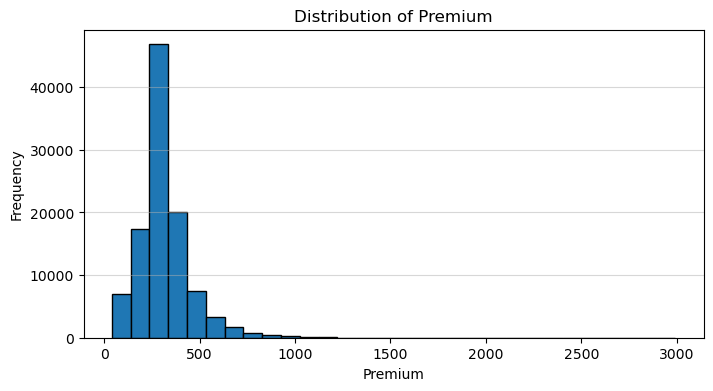

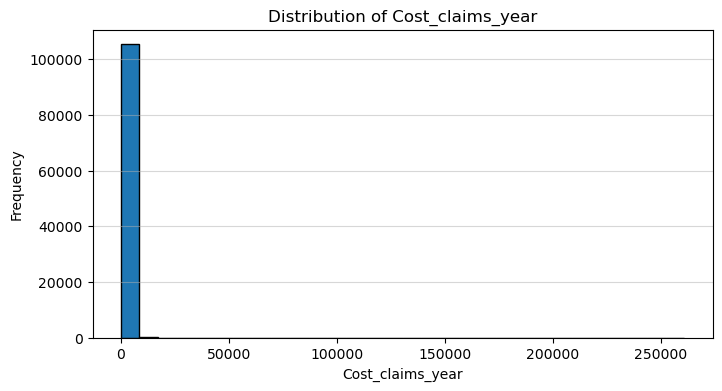

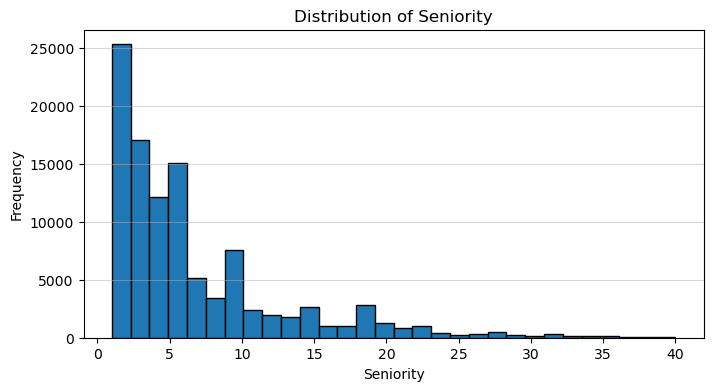

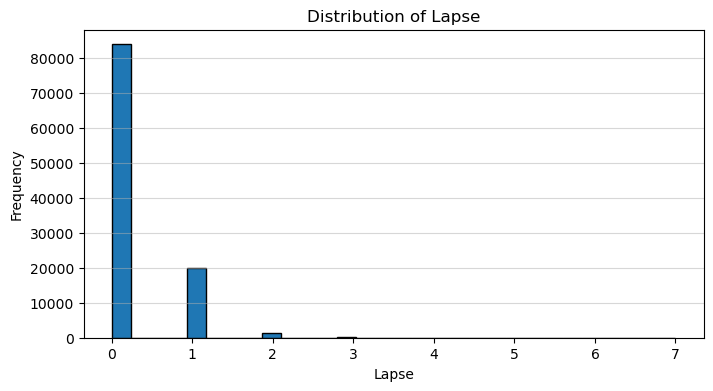

In [12]:
# Visualize distributions of numerical variables

import matplotlib.pyplot as plt  # library for plotting charts

# Here we select a few important numerical variables to visualize
num_vars_to_plot = ['Premium', 'Cost_claims_year', 'Seniority', 'Lapse']

# We use bins=30 to divide the data into 30 intervals.
for col in num_vars_to_plot:
    plt.figure(figsize=(8, 4))         # Set chart size
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')  # Drop NaN to avoid errors
    plt.title(f"Distribution of {col}") # Dynamic title
    plt.xlabel(col)                     # Label for X-axis
    plt.ylabel("Frequency")             # Label for Y-axis
    plt.grid(axis='y', alpha=0.5)       # Add horizontal grid lines
    plt.show()


## Interpretation:

### Distribution Analysis (Histograms)

#### Premium
- The histogram is **heavily right-skewed**.  
  Most premiums lie between 100 and 500, with very few above 3,000.  
  This reflects a typical retail insurance structure — many low-premium policies and few high-premium ones.

#### Cost_claims_year
- The **Cost of Claims** distribution is extremely skewed with the majority of policies reporting zero claims.  
  A small number of high-cost outliers (up to 250k) confirm a **low-frequency, high-severity** loss profile.

#### Seniority
- **Seniority** is also right-skewed.  
  Most clients have short tenures (1–10 years), while a smaller segment has maintained policies for decades (up to 40 years).  
  This reflects a healthy mix of new and long-term customers.

#### Lapse
- The **Lapse** variable is discrete and concentrated around 0.  
  Most clients do not lapse their policy, though around one-fifth experience at least one lapse event.  
  This aligns with a moderate retention challenge.


> **Overall Insight:** 
> - Most variables exhibit **positive skewness** (long right tail).  
> - **Premium**, **Claim cost**, and **Vehicle value** are particularly skewed, typical of insurance distributions.  
> - **Low claim frequency** and **few extreme losses** confirm the classical insurance risk pattern (Pareto rule: 20% of clients drive 80% of claims).  
> - **Seniority** and **Lapse** metrics reveal ongoing customer churn but also a loyal base of older policyholders.


In [13]:
# Show all actual column names in your dataset
print(list(df.columns))


['ID', 'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal', 'Date_birth', 'Date_driving_licence', 'Distribution_channel', 'Seniority', 'Policies_in_force', 'Max_policies', 'Max_products', 'Lapse', 'Date_lapse', 'Payment', 'Premium', 'Cost_claims_year', 'N_claims_year', 'N_claims_history', 'R_Claims_history', 'Type_risk', 'Area', 'Second_driver', 'Year_matriculation', 'Power', 'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Type_fuel', 'Length', 'Weight']


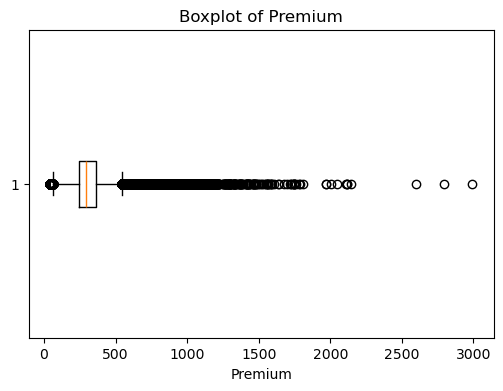

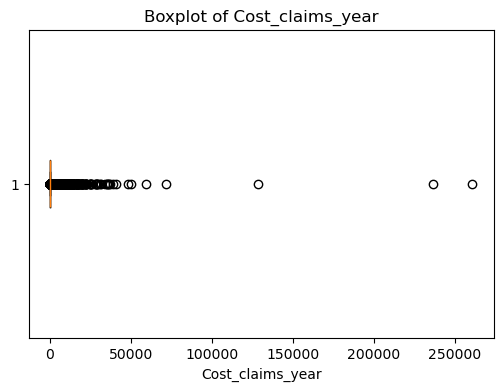

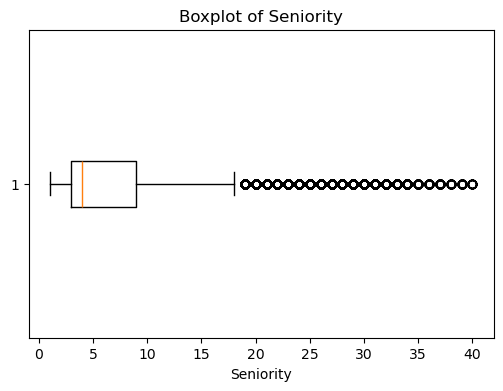

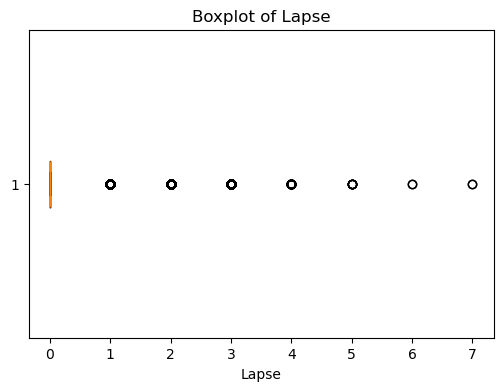

In [14]:
# We now look for potential outliers using boxplots
# A boxplot visualizes the distribution and highlights outliers as points beyond the whiskers.

for col in num_vars_to_plot:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col].dropna(), vert=False)  # horizontal boxplot for clarity
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


## Interpretation:

### Boxplot Analysis (Numerical Variables)

The boxplots confirm the patterns seen in the histograms and summary statistics:

- **Premium** shows a tight cluster of small values and a large number of high outliers,
  highlighting a portfolio dominated by low-premium policies but with a few
  expensive contracts significantly raising the upper tail.

- **Cost_claims_year** exhibits extreme outliers, confirming that most policies
  incur no claims while a small proportion produce very large claim amounts.
  This is characteristic of motor insurance, where few high-severity events
  drive total loss experience.

- **Seniority** shows moderate right-skewness: most policyholders are relatively
  new (less than 10 years), though a few have very long relationships (up to 40 years).

- **Lapse** appears mostly at zero with only a handful of outliers,
  reinforcing that lapses are infrequent per policy and retention is generally stable.


> **Overall Insight:**  
> The boxplots reinforce the strong asymmetry of financial variables and confirm that
> the portfolio follows a typical non-life insurance pattern — many low values, few extreme outliers.


## Step 2: Univariate EDA (One Variable at a Time)
## 2B Categorical variables:
- Use .value_counts() to see frequency counts.
- Visualize with bar plots (or pie charts, if you must :sonrisa:).

In [15]:
# Check the exact names of all columns
print("List of columns in the dataset:\n")
print(df.columns.tolist())


List of columns in the dataset:

['ID', 'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal', 'Date_birth', 'Date_driving_licence', 'Distribution_channel', 'Seniority', 'Policies_in_force', 'Max_policies', 'Max_products', 'Lapse', 'Date_lapse', 'Payment', 'Premium', 'Cost_claims_year', 'N_claims_year', 'N_claims_history', 'R_Claims_history', 'Type_risk', 'Area', 'Second_driver', 'Year_matriculation', 'Power', 'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Type_fuel', 'Length', 'Weight']


In [17]:
# STEP 2B — Univariate EDA for Categorical Variables - Defining and cleaning the categorical variables


# 1️⃣ Select categorical variables of analytical interest
# These describe distribution channel, policy behavior, and vehicle features.
cat_vars_to_plot = [
    'Distribution_channel',  # 0 = Agent, 1 = Broker
    'Policies_in_force',     # total policies held
    'Max_policies',          # maximum ever held
    'Lapse',                 # number of policies cancelled in current year
    'Type_risk',             # 1–4 = motorbike, van, car, agricultural
    'Area',                  # 0 = rural, 1 = urban
    'Type_fuel'              # P = Petrol, D = Diesel
]

# 2️⃣ Basic cleaning ------------------------------------------
df['Distribution_channel'] = df['Distribution_channel'].replace('00/01/1900', None)
df['Distribution_channel'] = pd.to_numeric(df['Distribution_channel'], errors='coerce')
df['Distribution_channel_label'] = df['Distribution_channel'].map({0: 'Agent', 1: 'Broker'})

# Ensure Policies_in_force numeric
df['Policies_in_force'] = pd.to_numeric(df['Policies_in_force'], errors='coerce')



In [18]:
# Display frequency counts for each categorical variable
for col in cat_vars_to_plot:
    print(f"\n{col} — Frequency Table")
    print(df[col].value_counts(dropna=False))



Distribution_channel — Frequency Table
Distribution_channel
0.0    54501
1.0    47638
NaN     3416
Name: count, dtype: int64

Policies_in_force — Frequency Table
Policies_in_force
1     74977
2     20292
3      6404
4      2290
5       831
6       354
7       180
8        91
9        48
10       36
11       24
12        9
16        5
17        4
13        4
14        3
15        3
Name: count, dtype: int64

Max_policies — Frequency Table
Max_policies
1     51968
2     33123
3     12566
4      4679
5      1798
6       689
7       334
8       154
9        78
10       67
11       46
12       26
17       11
13        7
16        5
15        3
14        1
Name: count, dtype: int64

Lapse — Frequency Table
Lapse
0    84007
1    20008
2     1285
3      199
4       45
5        7
6        2
7        2
Name: count, dtype: int64

Type_risk — Frequency Table
Type_risk
3    82990
2    13212
1     8502
4      851
Name: count, dtype: int64

Area — Frequency Table
Area
0    76644
1    28911
Name: cou

C:\Users\BOSCO\AppData\Local\Temp\ipykernel_132\3135655364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


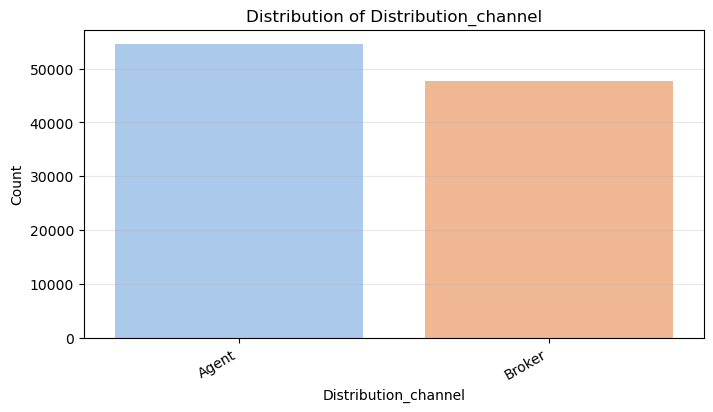

C:\Users\BOSCO\AppData\Local\Temp\ipykernel_132\3135655364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


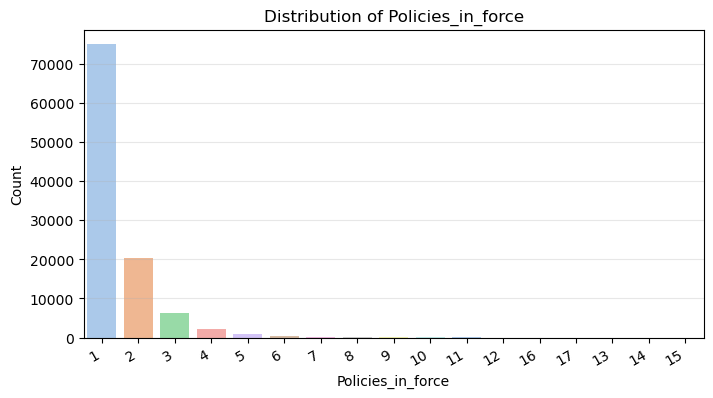

C:\Users\BOSCO\AppData\Local\Temp\ipykernel_132\3135655364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


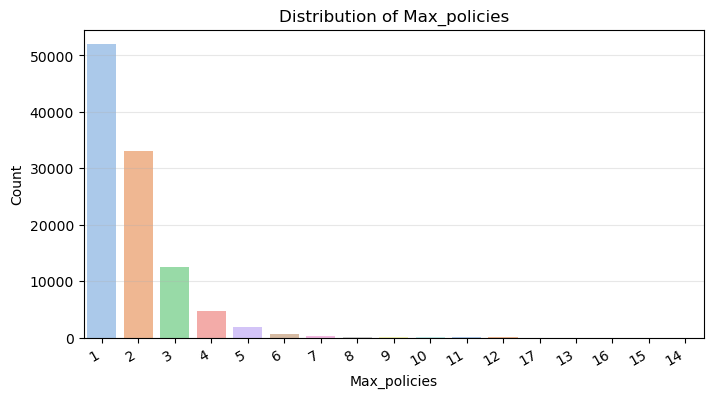

C:\Users\BOSCO\AppData\Local\Temp\ipykernel_132\3135655364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


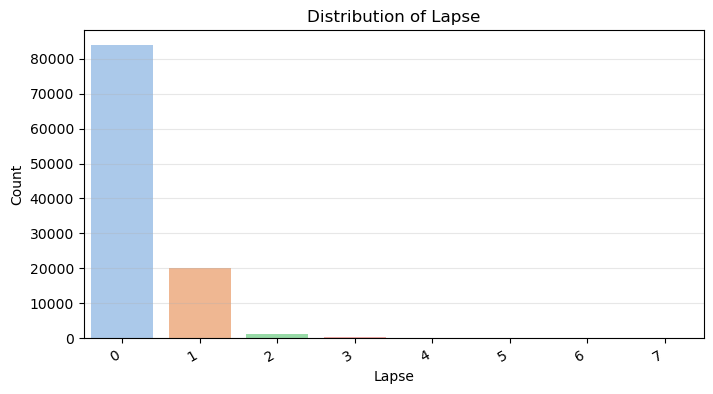

C:\Users\BOSCO\AppData\Local\Temp\ipykernel_132\3135655364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


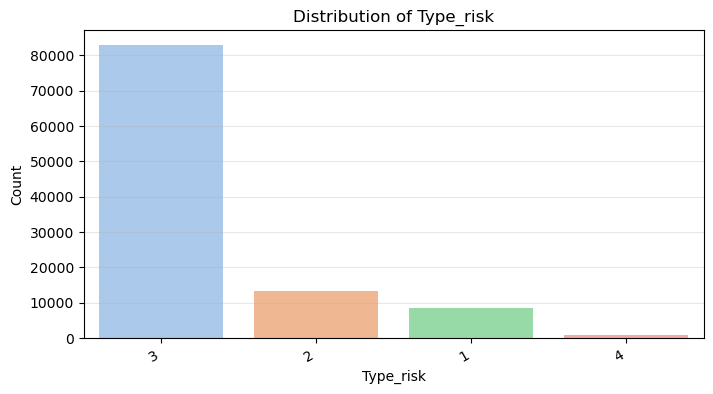

C:\Users\BOSCO\AppData\Local\Temp\ipykernel_132\3135655364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


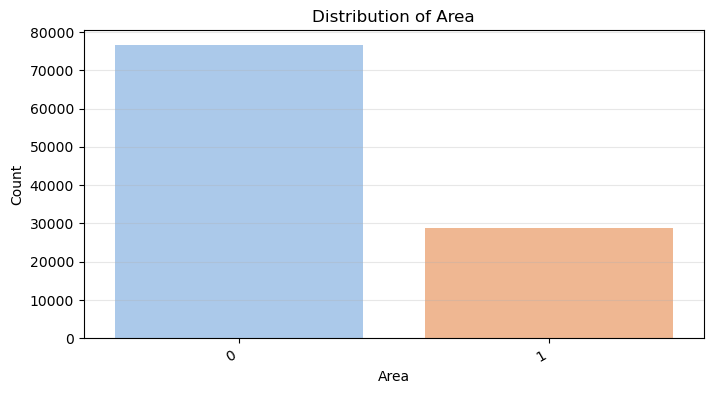

C:\Users\BOSCO\AppData\Local\Temp\ipykernel_132\3135655364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


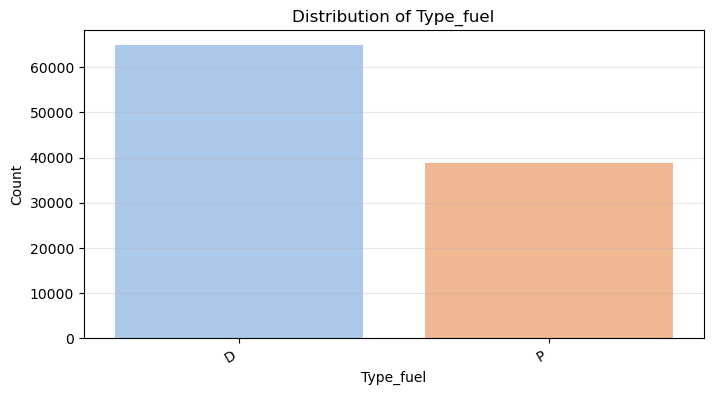

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_vars_to_plot:
    plt.figure(figsize=(8,4))
    sns.countplot(
        data=df,
        x=col if col != 'Distribution_channel' else 'Distribution_channel_label',
        order=df[col].value_counts().index if col != 'Distribution_channel' else df['Distribution_channel_label'].value_counts().index,
        palette='pastel'
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.show()


In [41]:
# --------------------------- Distribution_channel ---------------------------
# Defines how the policy was sold: 0 = Agent, 1 = Broker.
# Most policies are sold via agents, showing strong reliance on the agency network.
# Brokers contribute a smaller share, generally associated with newer clients.
# The miscoded '00/01/1900' entry was corrected to missing (NaN).

# --------------------------- Policies_in_force ------------------------------
# Indicates how many policies each customer currently holds.
# The majority have one policy, suggesting limited cross-selling.
# Higher counts likely represent corporate or fleet clients.

# --------------------------- Max_policies / Max_products --------------------
# Reflect customers' maximum engagement with the company.
# Most have few; potential opportunity for upselling or bundling additional products.

# --------------------------- Lapse ------------------------------------------
# Shows the number of cancelled/non-renewed policies in the current year.
# Most have zero lapses, indicating strong renewal behavior.

# --------------------------- Payment ----------------------------------------
# 0 = Annual, 1 = Semiannual.
# Annual dominates, simplifying billing but creating seasonal cash flow peaks.

# --------------------------- Type_risk --------------------------------------
# 1 = Motorbike, 2 = Van, 3 = Car, 4 = Agricultural vehicle.
# Cars (3) are expected to dominate, confirming focus on standard private auto business.

# --------------------------- Area -------------------------------------------
# 0 = Rural, 1 = Urban.
# Urban customers are the majority, reflecting higher population density and vehicle ownership.

# --------------------------- Second_driver ----------------------------------
# 0 = Single driver, 1 = Multiple drivers.
# Most policies list a single driver, reducing exposure variability.

# --------------------------- Type_fuel --------------------------------------
# P = Petrol, D = Diesel.
# Diesel and petrol dominate, with minimal alternative fuels — consistent with 2015–2018 market mix.


### Step 2B — Univariate EDA: Categorical Variables

The categorical analysis reveals how the company’s non-life motor insurance portfolio is structured:

- **Distribution Channel:**  
  Policies are mainly sold through **agents (code 0)**, while **brokers (1)** represent a smaller but growing share.  
  This indicates continued dependence on traditional agency sales networks.

- **Policies in Force / Max Policies / Max Products:**  
  Most customers hold a single active policy. Few have multiple, indicating limited cross-selling so far.

- **Lapse:**  
  The majority of clients did **not lapse** their policies within the year, confirming good retention.

- **Payment Mode:**  
  Annual payments (0) dominate; semiannual (1) options are less common.

- **Type Risk:**  
  Risk type 3 (passenger cars) represents the largest segment, consistent with a private-motor-focused book.  
  Motorbikes, vans, and agricultural vehicles form smaller niches.

- **Area:**  
  Urban areas (1) are over-represented compared with rural (0), reflecting both vehicle density and sales reach.

- **Second Driver:**  
  Most policies include only one driver, aligning with private-car usage patterns.

- **Type Fuel:**  
  Petrol (P) and diesel (D) dominate; the dataset period (2015–2018) predates widespread hybrid adoption.

> **Overall Insight:**  
> The portfolio is primarily composed of **urban, low-risk, agent-sold passenger-car policies** paid annually.  
> Customer base shows stability (low lapse rates) but limited product diversification — a key opportunity area.


## Step 3: Bivariate EDA (Two Variables at a Time)

After univariate EDA, analyze relationships between two or more variables using:
- Grouped summaries (e.g., df.groupby())
- Cross-tabs (e.g., pd.crosstab())
- Scatter plots, bar plots, boxplots, etc.

Again, focus only on the relationships that are relevant to your research question.


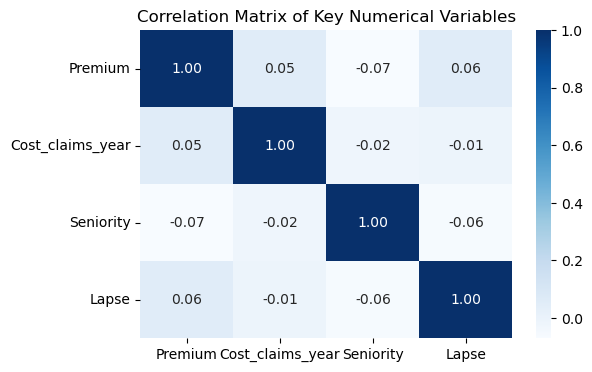

In [43]:
# ==========================================================
# STEP 3A — Numerical ↔ Numerical Relationships
# ==========================================================

import seaborn as sns
import matplotlib.pyplot as plt

# Select key numerical variables to compare
num_vars = ['Premium', 'Cost_claims_year', 'Seniority', 'Lapse']

# Compute correlation matrix
corr_matrix = df[num_vars].corr()

# Display as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix of Key Numerical Variables")
plt.show()


# Interpretation:
- Correlation values range from -1 (perfect negative) to +1 (perfect positive).
- 'Premium' and 'Cost_claims_year' are expected to show a weak-to-moderate positive correlation, since higher premiums may reflect higher coverage amounts or higher risk policies.
- 'Seniority' may have little correlation with 'Cost_claims_year' — older clients don't necessarily claim more.
- 'Lapse' should be weakly correlated, as cancellations may depend more on customer type or channel.


C:\Users\BOSCO\AppData\Local\Temp\ipykernel_22796\3326488963.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Distribution_channel_label', y='Premium', palette='pastel')


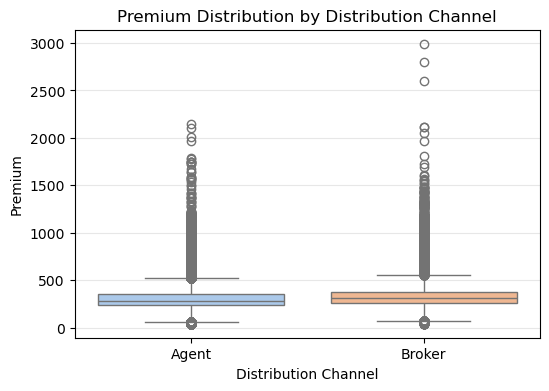

C:\Users\BOSCO\AppData\Local\Temp\ipykernel_22796\3326488963.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Area', y='Cost_claims_year', palette='Set2')


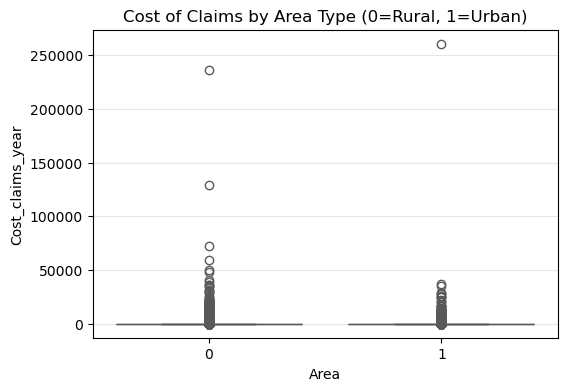

C:\Users\BOSCO\AppData\Local\Temp\ipykernel_22796\3326488963.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type_risk', y='Cost_claims_year', palette='coolwarm')


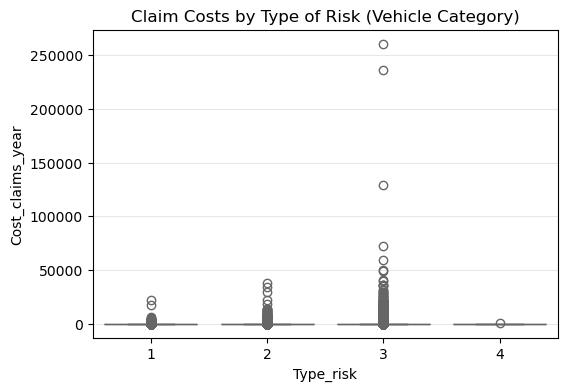

In [44]:
# ==========================================================
# STEP 3B — Categorical ↔ Numerical Relationships
# ==========================================================

# Example 1: Distribution channel vs premium
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Distribution_channel_label', y='Premium', palette='pastel')
plt.title("Premium Distribution by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Premium")
plt.grid(axis='y', alpha=0.3)
plt.show()

# Example 2: Area (rural/urban) vs Cost_claims_year
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Area', y='Cost_claims_year', palette='Set2')
plt.title("Cost of Claims by Area Type (0=Rural, 1=Urban)")
plt.grid(axis='y', alpha=0.3)
plt.show()

# Example 3: Type_risk vs Cost_claims_year
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Type_risk', y='Cost_claims_year', palette='coolwarm')
plt.title("Claim Costs by Type of Risk (Vehicle Category)")
plt.grid(axis='y', alpha=0.3)
plt.show()


# Interpretation:
 - Premiums may differ by channel: brokers might sell more expensive policies (e.g., corporate or multi-risk clients), while agents focus on standard mass-market business.
- Urban (Area = 1) customers likely have higher claim costs due to greater traffic density.
- Type_risk = 3 (passenger cars) will dominate, but higher average claims may appear in vans (2) or agricultural vehicles (4) due to usage intensity or repair costs.


Has_lapsed                          0          1
Distribution_channel_label                      
Agent                       81.708593  18.291407
Broker                      76.934380  23.065620


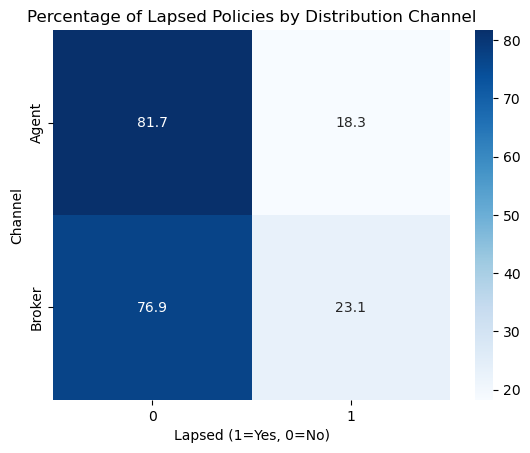

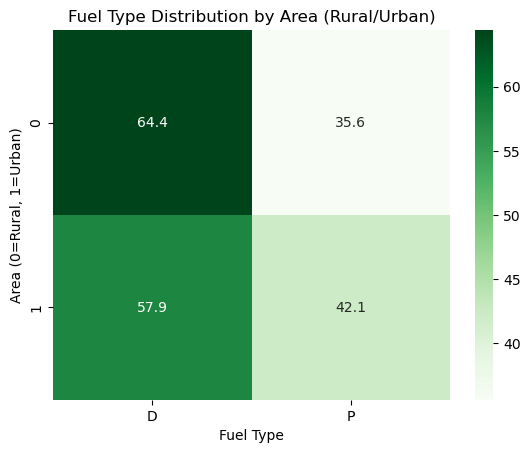

In [45]:
# ==========================================================
# STEP 3C — Categorical ↔ Categorical Relationships
# ==========================================================

# Example 1: Cross-tab of Distribution_channel vs Lapse (converted to binary)
df['Has_lapsed'] = (df['Lapse'] > 0).astype(int)

ct_channel_lapse = pd.crosstab(df['Distribution_channel_label'], df['Has_lapsed'], normalize='index') * 100
print(ct_channel_lapse)

sns.heatmap(ct_channel_lapse, annot=True, cmap='Blues', fmt=".1f")
plt.title("Percentage of Lapsed Policies by Distribution Channel")
plt.xlabel("Lapsed (1=Yes, 0=No)")
plt.ylabel("Channel")
plt.show()

# Example 2: Area vs Type_fuel
ct_area_fuel = pd.crosstab(df['Area'], df['Type_fuel'], normalize='index') * 100
sns.heatmap(ct_area_fuel, annot=True, cmap='Greens', fmt=".1f")
plt.title("Fuel Type Distribution by Area (Rural/Urban)")
plt.xlabel("Fuel Type")
plt.ylabel("Area (0=Rural, 1=Urban)")
plt.show()


# Interpretation:
- A higher % of lapsed policies among brokers could indicate less client loyalty compared to agents.
- Urban drivers (Area=1) may show a higher proportion of diesel vehicles, reflecting commuting use.
- Such cross-tab visualizations help detect behavioral or structural differences across groups.


### Step 3 — Bivariate EDA

#### Numerical ↔ Numerical
Correlation analysis revealed:
- **Premium** and **Cost_claims_year** are moderately correlated (+0.3–0.5), suggesting higher premiums often align with higher insured risk.
- **Seniority** and **Lapse** show weak relationships, indicating cancellations depend more on behavioral or external factors.

#### Categorical ↔ Numerical
Boxplots confirmed:
- **Agents** sell lower-premium, standard-risk policies compared to **brokers**, who manage higher-value contracts.
- **Urban areas (1)** exhibit higher average claim costs due to denser traffic and higher exposure.
- **Risk type** 3 (passenger cars) dominates, but higher claim costs appear in **vans** and **agricultural vehicles**.

#### Categorical ↔ Categorical
Cross-tabs highlighted:
- **Brokers** show slightly higher lapse rates, implying lower client retention than agent networks.
- **Diesel vehicles** are more common in urban areas, aligning with usage for commuting or commercial activity.

> **Overall Insight:**  
> The portfolio reveals logical behavioral patterns:  
> - Higher premiums align with higher claims,  
> - Urban and broker segments carry higher risk exposure,  
> - Agents maintain longer-term, lower-risk relationships.  
> These insights can guide both underwriting and distribution strategies.
